# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




In [3]:
# A hipótese alternativa (H1) afirma que a média das notas na Estratégia B é maior do que a média das notas na Estratégia A. Por isso, o teste é unilateral à direita, pois estamos interessados apenas em verificar se a média de B está acima da média de A, focando na cauda direita da distribuição.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
#Seu código aqui
media_A = amostra_estrategia_A.mean()
media_B = amostra_estrategia_B.mean()
variancia_A = amostra_estrategia_A.var(ddof=1)  
variancia_B = amostra_estrategia_B.var(ddof=1)

print("Média Estratégia A:", media_A)
print("Média Estratégia B:", media_B)
print("Variância Estratégia A:", variancia_A)
print("Variância Estratégia B:", variancia_B)


Média Estratégia A: 71.40559272313098
Média Estratégia B: 74.74868110507046
Variância Estratégia A: 129.2654943565623
Variância Estratégia B: 110.4700206552835


In [ ]:
# A média da Estratégia B é maior, o que apoia a hipótese alternativa (H1): os alunos da Estratégia B, em média, tiveram um desempenho melhor do que os da Estratégia A.
# A variância da Estratégia B é menor, o que indica que os resultados dessa estratégia foram mais consistentes — ou seja, os alunos tendem a ter notas mais próximas da média, com menos dispersão.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [5]:
#Seu código aqui
n=50
z_statistic = (media_B - media_A) / ((variancia_A/n + variancia_B/n)**0.5)
p_valor =(1 - stats.norm.cdf(abs(z_statistic)))
print("Estatística de teste Z:", z_statistic)
print("p-valor:", p_valor)

nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: Há evidências, a 5% de significância de que a média das notas na Estratégia B é maior do que a média das notas na Estratégia A.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para concluir que a média das notas na Estratégia B é maior do que a média das notas na Estratégia A.")

Estatística de teste Z: 1.5267455833477102
p-valor: 0.06341214386181693
Não rejeitamos a hipótese nula: Não há evidências suficientes para concluir que a média das notas na Estratégia B é maior do que a média das notas na Estratégia A.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

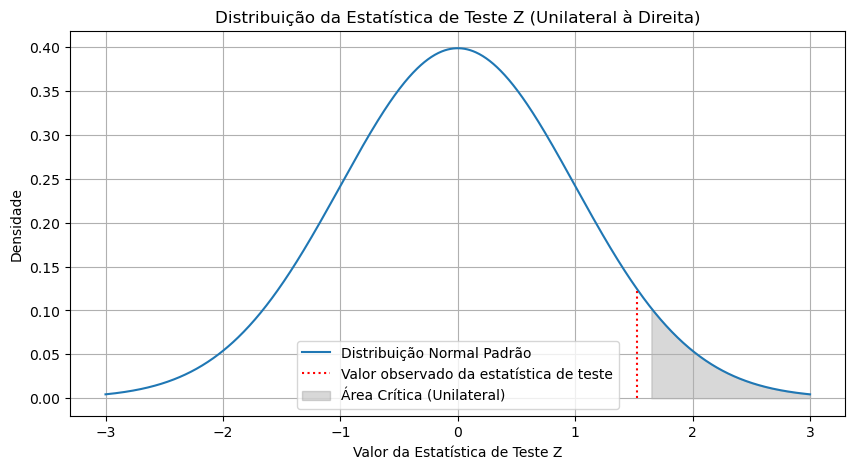

In [6]:
#Seu código aqui
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)

ax.plot(x, y, label='Distribuição Normal Padrão')

ax.vlines(x=[z_statistic], ymin=0, ymax=stats.norm.pdf(z_statistic, 0, 1),
          colors='r', linestyles='dotted', label='Valor observado da estatística de teste')

critical_region_start = stats.norm.ppf(0.95) 
ax.fill_between(x, y, where=(x > critical_region_start), color='gray', alpha=0.3, label='Área Crítica (Unilateral)')

plt.legend()
plt.xlabel('Valor da Estatística de Teste Z')
plt.ylabel('Densidade')
plt.title('Distribuição da Estatística de Teste Z (Unilateral à Direita)')
plt.grid(True)
plt.show()

In [ ]:
# Pode-se observar que o valor observado na estatística de teste não está dentro da área crítica (de rejeição), o que ilustra que não há evidências suficientes para concluir que a média das notas na Estratégia B é maior do que a média das notas na Estratégia A. 